<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-04-29 19:10:25--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 108.177.126.139, 108.177.126.100, 108.177.126.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-2c-docs.googleusercontent.com/docs/securesc/h860n56d7bu4sl0o1inao8jdabk9a028/8srt8aap7ov8qsu36h1i8cjht98hmmn3/1588187400000/11146100322577758036/05877664141538489533Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-04-29 19:10:26--  https://doc-0g-2c-docs.googleusercontent.com/docs/securesc/h860n56d7bu4sl0o1inao8jdabk9a028/8srt8aap7ov8qsu36h1i8cjht98hmmn3/1588187400000/11146100322577758036/05877664141538489533Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-0g-2c-docs.googleusercontent.com (doc-0g-2c-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connectin

**Añadir carpeta**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import scipy.io as sio
from joblib import dump
from sklearn import datasets
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from main_functions import PRI,MiniBatchPRI,spectralClustering,Knn,Lconvert
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin


**Cargar Bases de datos**

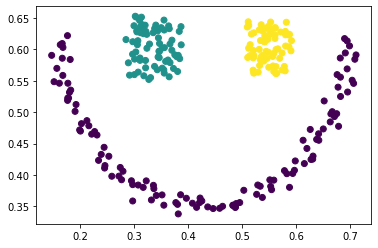

In [4]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Parte 1**

**Punto Fijo**

el tiempo requerido fue:0.7124097347259521sg
Ari: 0.39811041152236226 y accuracy: 0.7368421052631579


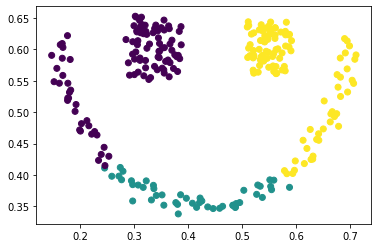

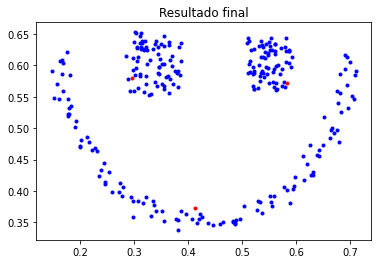

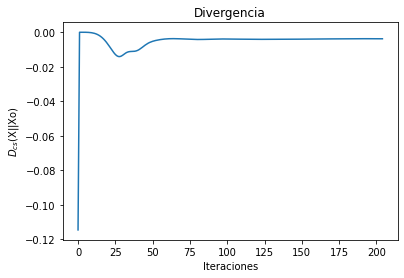

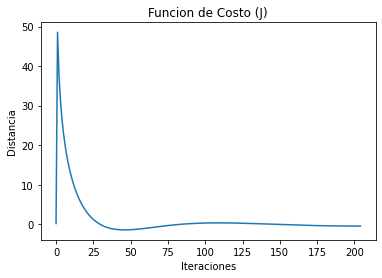

In [0]:
t = time.time()
p = PRI(n_groups=3, lambda_=15, sigma_initial=40, method='FP',
                 reduction_ = True)
p.fit(happy,labels_happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_FP=p.predict(happy,labels_happy)
Rari_Fp=adjusted_rand_score(labels_happy,labels_pre_FP)
Racc_Fp=accuracy_score(labels_happy,labels_pre_FP)
print('Ari: '+str(Rari_Fp)+' y'+' accuracy: '+str(Racc_Fp))
p.results()


**SGD**

el tiempo requerido fue:1.2319707870483398sg
Ari: 0.3925932971355734 y accuracy: 0.7330827067669173


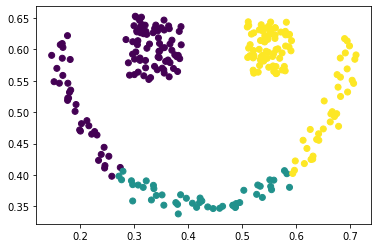

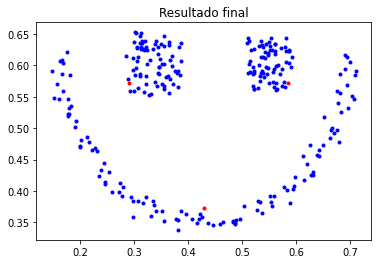

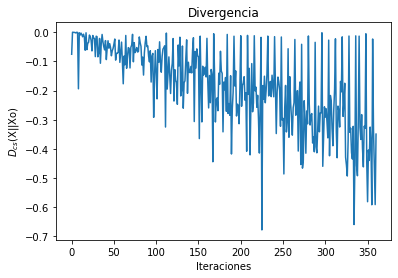

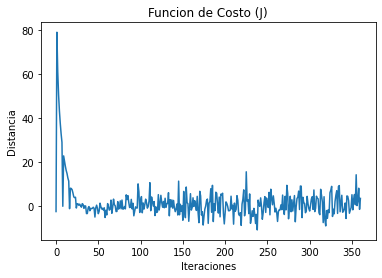

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=40, method='SGD',
                 reduction_ = True)
p.fit(happy,labels_happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGD=p.predict(happy,labels_happy)
Rari_SGD=adjusted_rand_score(labels_happy,labels_pre_SGD)
Racc_SGD=accuracy_score(labels_happy,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
p.results()

**Adam**

el tiempo requerido fue:2.243462324142456sg
Ari: 0.3976446310545555 y accuracy: 0.7368421052631579


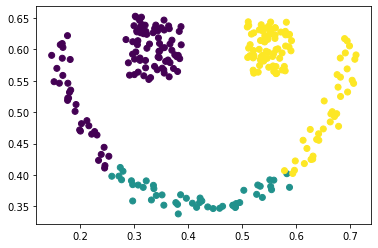

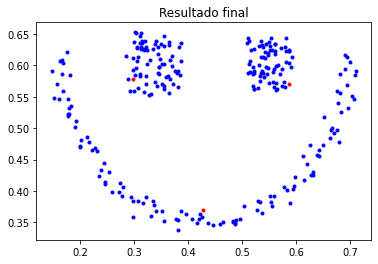

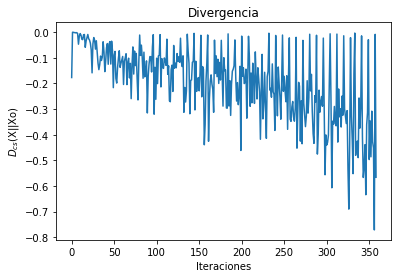

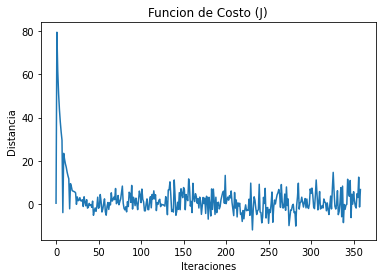

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=40, method='SGD',optimization='Adam',
                 reduction_ = True)
p.fit(happy,labels_happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGDA=p.predict(happy,labels_happy)
Rari_SGDA=adjusted_rand_score(labels_happy,labels_pre_SGDA)
Racc_SGDA=accuracy_score(labels_happy,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))
p.results()

**Nadam**

el tiempo requerido fue:0.9088702201843262sg
Ari: 0.40186447862262187 y accuracy: 0.7406015037593985


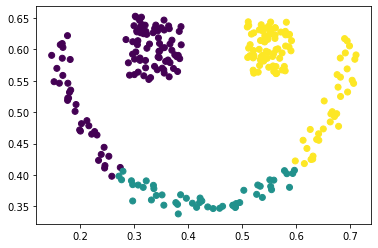

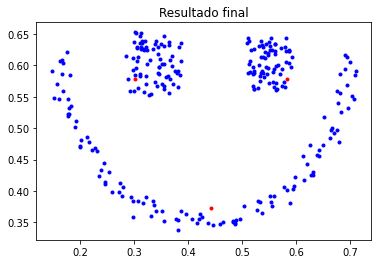

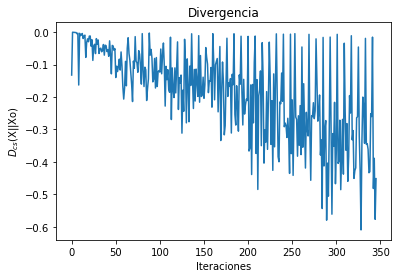

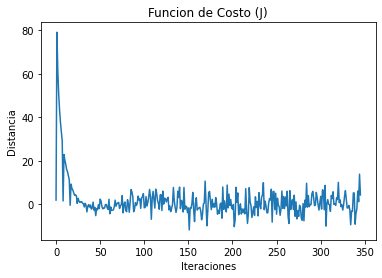

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=40, method='SGD',optimization='Nadam',
                 reduction_ = True)
p.fit(happy,labels_happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGDN=p.predict(happy,labels_happy)
Rari_SGDN=adjusted_rand_score(labels_happy,labels_pre_SGDN)
Racc_SGDN=accuracy_score(labels_happy,labels_pre_SGDN)
print('Ari: '+str(Rari_SGDN)+' y'+' accuracy: '+str(Racc_SGDN))
p.results()

**KNN**

In [0]:
knn_happy=KMeans(n_clusters=3)
knn_happy.fit(happy)
labels_pre_KNN=knn_happy.labels_
labels_pre_KNN=Lconvert().fit(labels_pre_KNN,labels_happy)
Rari_KNN=adjusted_rand_score(labels_happy,labels_pre_KNN)
Racc_KNN=accuracy_score(labels_happy,labels_pre_KNN)
print('Ari: '+str(Rari_KNN)+' y'+' accuracy: '+str(Racc_KNN))


Ari: 0.4022130084121129 y accuracy: 0.7406015037593985


(0.11896678550925124,
 0.7385885706915943,
 0.32241855402955133,
 0.6681544114995808)

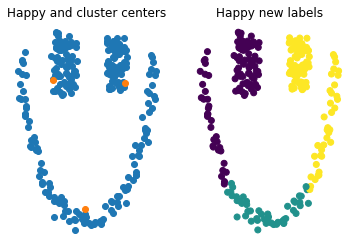

In [0]:
plt.subplot(121)
plt.scatter(happy[:,0],happy[:,1])
plt.scatter(knn_happy.cluster_centers_[:,0],knn_happy.cluster_centers_[:,1])
plt.title('Happy and cluster centers')
plt.axis('off')
plt.subplot(122)
plt.scatter(happy[:,0],happy[:,1],c=labels_pre_KNN)
plt.title('Happy new labels')
plt.axis('off')

**Spectral CLustering**

In [0]:
sc_happy=SpectralClustering(gamma=1000,n_clusters=3,n_neighbors=2)
sc_happy.fit(happy)
labels_pre_sc=sc_happy.labels_
labels_pre_sc=Lconvert().fit(labels_pre_sc,labels_happy)
Rari_sc=adjusted_rand_score(labels_happy,labels_pre_sc)
Racc_sc=accuracy_score(labels_happy,labels_pre_sc)
print('Ari: '+str(Rari_sc)+' y'+' accuracy: '+str(Racc_sc))


Ari: 1.0 y accuracy: 1.0


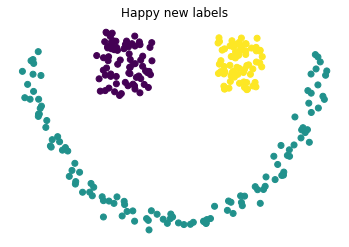

In [0]:
ax2=plt.subplot()
ax2=plt.scatter(happy[:,0],happy[:,1],c=labels_pre_sc)
ax2=plt.title('Happy new labels')
ax2=plt.axis('off')

**Con ruido**

**Happy**

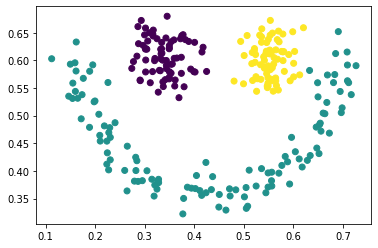

In [0]:
noise = np.random.normal(0,1,happy.shape)
noisy_happy=happy+noise*0.02
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Moons**

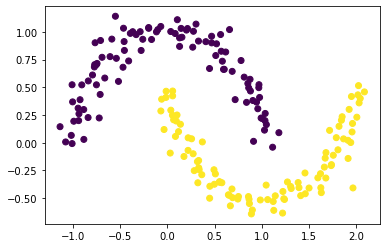

In [5]:
from sklearn import  datasets
noisy_moons,labels_moons = datasets.make_moons(n_samples=200, noise=.085)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Resultados**

**Happy**

In [0]:
n_clusters=3
steps =[[('rep',spectralClustering())],
        [('rep',Knn())], 
        [('rep', PRI( reduction_ = True,method='FP',n_groups=n_clusters))], 
         [('rep', MiniBatchPRI( reduction_ = True,n_groups=n_clusters))], 
         [('rep', MiniBatchPRI( reduction_ = True,n_groups=n_clusters,method='SGD',optimization='Adam'))], 
          [('rep',  MiniBatchPRI( reduction_ = True,n_groups=n_clusters,method='SGD',optimization='Nadam'))]] 
         
parameters =[{'rep__n_clusters':[n_clusters],'rep__gamma':[10,100,200,500,1000],'rep__n_neighbors':[5,10,15]},
             {'rep__n_clusters':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9]}]

In [0]:
#valildacion cruzada anidada
for i in range(len(steps)):
  method = Pipeline(steps[i]) 
  meth_name = ['sc', 'Knn', 'FP','SGD','SGDA','SGDN']
  name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
  Niter = 10 #numero particiones
  acc_ars =np.zeros(Niter)#arreglo para guardar acierto
  acc=acc_ars
  Nc = len(np.unique(labels_happy))
  cmc_ars = np.zeros((Niter,Nc,Nc))#arreglo para guarda matrices de confusion
  cmc=cmc_ars
  best_estimators_ars = []#mejor metodo por iteracion
  best_estimators=best_estimators_ars
  best_parameters_ars = []#mejor metodo por iteracion
  best_parameters=best_parameters_ars
  for j in range(Niter):
          print('it %d/%d'%(j+1,Niter))
          ## adjusted_rand_score
          X_train, X_test, y_train, y_test = train_test_split(happy,labels_happy,test_size=0.2, stratify=labels_happy)
          grid_search_ars = GridSearchCV(method, parameters[i],cv=5,verbose=1,scoring='adjusted_rand_score',n_jobs=5)
          #generar mejor modelo
          grid_search_ars.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search_ars.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators_ars.append(grid_search_ars.best_estimator_)
          best_parameters_ars.append(grid_search_ars.best_params_)
          
          #guardar acierto
          acc_ars[j] = 100*adjusted_rand_score(y_test,y_pred)
          #estimar matriz de confusion
          cm = confusion_matrix(y_test, y_pred)
          cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cmc_ars[j] = cm
          print('it %d/%d'%(j+1,Niter))
          print(grid_search_ars.best_params_)
          print('acc_ars:',acc[j])
          print('confusionmatrix_ars \n',cmc[j])

          ## Accuracy
          X_train, X_test, y_train, y_test = train_test_split(happy,labels_happy,test_size=0.2, stratify=labels_happy)
          grid_search = GridSearchCV(method, parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=5)
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_parameters.append(grid_search.best_params_)
          
          #guardar acierto
          acc[j] = 100*accuracy_score(y_test,y_pred)
          #estimar matriz de confusion
          cm = confusion_matrix(y_test, y_pred)
          cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cmc[j] = cm
          print('it %d/%d'%(j+1,Niter))
          print(grid_search.best_params_)
          print('acc:',acc[j])
          print('confusionmatrix \n',cmc[j])
          savedata = {
              'acc':acc,
              'acc_ars':acc_ars,
              'confusionmatrix':cmc,
              'confusionmatrix_ars':cmc_ars,
              'best_models':best_estimators,
              'best_models_ars':best_estimators_ars,
              'best_parameters':best_parameters,
              'best_parameters_ars':best_parameters_ars,
                } 
          dump(savedata,name)

it 1/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.9s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   21.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:    9.5s remaining:    1.3s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   13.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 2/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:    9.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:   11.1s remaining:    1.5s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   20.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 3/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:    4.2s remaining:    0.6s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:    9.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 3/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:    7.0s remaining:    1.0s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   11.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 3/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 4/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   12.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:    7.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 5/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:    8.7s remaining:    1.2s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   14.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10
{'rep__gamma': 1000, 'rep__n_clusters': 3, 'rep__n_neighbors': 10}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:   17.0s remaining:    2.3s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   24.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 6/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:    6.5s remaining:    0.9s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   13.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   11.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 7/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:    4.7s remaining:    0.6s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:    8.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 7/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:   11.1s remaining:    1.5s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   14.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 7/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 8/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:   21.5s remaining:    2.9s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   32.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   10.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 9/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:    8.7s remaining:    1.2s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   17.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:    6.2s remaining:    0.8s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   11.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 10/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:   10.5s remaining:    1.4s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   18.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc_ars: 52.46636771300448
confusionmatrix_ars 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  66 out of  75 | elapsed:   13.8s remaining:    1.9s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:   24.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s


it 10/10
{'rep__gamma': 500, 'rep__n_clusters': 3, 'rep__n_neighbors': 5}
acc: 72.22222222222221
confusionmatrix 
 [[  0. 100.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters': 3}
acc_ars: 31.872300073754083
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [ 33.33333333   0.          66.66666667]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.           0.           0.        ]
 [ 54.16666667   0.          45.83333333]
 [  0.           0.         100.        ]]
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 2/10
{'rep__n_clusters': 3}
acc_ars: 29.303349333050466
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [ 45.83333333   0.          54.16666667]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 2/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.           0.           0.        ]
 [ 41.66666667   0.          58.33333333]
 [  0.           0.         100.        ]]
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters': 3}
acc_ars: 29.303349333050466
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [ 45.83333333   0.          54.16666667]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 3/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.    0.    0. ]
 [ 37.5   0.   62.5]
 [  0.    0.  100. ]]
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 4/10
{'rep__n_clusters': 3}
acc_ars: 30.677764565992867
confusionmatrix_ars 
 [[100.    0.    0. ]
 [ 37.5   0.   62.5]
 [  0.    0.  100. ]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.    0.    0. ]
 [ 62.5   0.   37.5]
 [  0.    0.  100. ]]
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters': 3}
acc_ars: 30.677764565992867
confusionmatrix_ars 
 [[100.    0.    0. ]
 [ 37.5   0.   62.5]
 [  0.    0.  100. ]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 5/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.           0.           0.        ]
 [ 45.83333333   0.          54.16666667]
 [  0.           0.         100.        ]]
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 6/10
{'rep__n_clusters': 3}
acc_ars: 29.303349333050466
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [ 54.16666667   0.          45.83333333]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 6/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.           0.           0.        ]
 [ 58.33333333   0.          41.66666667]
 [  0.           0.         100.        ]]
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters': 3}
acc_ars: 29.130850047755498
confusionmatrix_ars 
 [[100.   0.   0.]
 [ 50.   0.  50.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 7/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.           0.           0.        ]
 [ 54.16666667   0.          45.83333333]
 [  0.           0.         100.        ]]
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 8/10
{'rep__n_clusters': 3}
acc_ars: 30.677764565992867
confusionmatrix_ars 
 [[100.    0.    0. ]
 [ 37.5   0.   62.5]
 [  0.    0.  100. ]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 8/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.           0.           0.        ]
 [ 45.83333333   0.          54.16666667]
 [  0.           0.         100.        ]]
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters': 3}
acc_ars: 29.130850047755498
confusionmatrix_ars 
 [[100.   0.   0.]
 [ 50.   0.  50.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 9/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.    0.    0. ]
 [ 62.5   0.   37.5]
 [  0.    0.  100. ]]
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 10/10
{'rep__n_clusters': 3}
acc_ars: 29.303349333050466
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [ 54.16666667   0.          45.83333333]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10
{'rep__n_clusters': 3}
acc: 55.55555555555556
confusionmatrix 
 [[100.           0.           0.        ]
 [ 54.16666667   0.          45.83333333]
 [  0.           0.         100.        ]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   34.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.7min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.2min finished


it 1/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc_ars: 48.67636947054779
confusionmatrix_ars 
 [[80.         20.          0.        ]
 [12.5        87.5         0.        ]
 [ 0.         26.66666667 73.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   29.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.5min finished


it 1/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 48.148148148148145
confusionmatrix 
 [[ 73.33333333   0.          26.66666667]
 [ 37.5          0.          62.5       ]
 [  0.           0.         100.        ]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.4min finished


it 2/10
{'rep__lambda_': 50, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc_ars: 26.943091231178034
confusionmatrix_ars 
 [[ 60.          33.33333333   6.66666667]
 [  0.          33.33333333  66.66666667]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.6min finished


it 2/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc: 62.96296296296296
confusionmatrix 
 [[53.33333333 46.66666667  0.        ]
 [ 0.         95.83333333  4.16666667]
 [ 0.         80.         20.        ]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.3min finished


it 3/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc_ars: 26.596334031842378
confusionmatrix_ars 
 [[ 73.33333333  26.66666667   0.        ]
 [  4.16666667  95.83333333   0.        ]
 [  0.         100.           0.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.3min finished


it 3/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 62.96296296296296
confusionmatrix 
 [[46.66666667 53.33333333  0.        ]
 [ 0.         87.5        12.5       ]
 [ 0.         60.         40.        ]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   25.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.1min finished


it 4/10
{'rep__lambda_': 50, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc_ars: 30.45496218198488
confusionmatrix_ars 
 [[ 40.          26.66666667  33.33333333]
 [  8.33333333  70.83333333  20.83333333]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   35.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.1min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 40}
acc: 81.48148148148148
confusionmatrix 
 [[ 73.33333333  26.66666667   0.        ]
 [  4.16666667  75.          20.83333333]
 [  0.           0.         100.        ]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   34.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 17.575078003120126
confusionmatrix_ars 
 [[ 66.66666667  33.33333333   0.        ]
 [ 12.5         87.5          0.        ]
 [  0.         100.           0.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 5/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 57.407407407407405
confusionmatrix 
 [[ 46.66666667  20.          33.33333333]
 [  0.          37.5         62.5       ]
 [  0.           0.         100.        ]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   29.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.6min finished


it 6/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 29.303349333050466
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [ 54.16666667   0.          45.83333333]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.6min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 77.77777777777779
confusionmatrix 
 [[100.           0.           0.        ]
 [ 25.          66.66666667   8.33333333]
 [  0.          26.66666667  73.33333333]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.4min finished


it 7/10
{'rep__lambda_': 30, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc_ars: 29.81991525423729
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [ 41.66666667   0.          58.33333333]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.0min finished


it 7/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 92.5925925925926
confusionmatrix 
 [[ 93.33333333   6.66666667   0.        ]
 [ 12.5         87.5          0.        ]
 [  0.           0.         100.        ]]


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   35.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.3min finished


it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits
it 8/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc_ars: 0.7800312012480516
confusionmatrix_ars 
 [[ 33.33333333  66.66666667   0.        ]
 [ 33.33333333  66.66666667   0.        ]
 [  0.         100.           0.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.5min finished


it 8/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc: 70.37037037037037
confusionmatrix 
 [[ 66.66666667  33.33333333   0.        ]
 [  8.33333333  54.16666667  37.5       ]
 [  0.           0.         100.        ]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   35.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.7min finished


it 9/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 34.10786247106234
confusionmatrix_ars 
 [[73.33333333 26.66666667  0.        ]
 [20.83333333 79.16666667  0.        ]
 [ 0.         33.33333333 66.66666667]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.0min finished


it 9/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 59.25925925925925
confusionmatrix 
 [[100.           0.           0.        ]
 [ 50.           8.33333333  41.66666667]
 [  0.           0.         100.        ]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   26.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.5min finished


it 10/10
{'rep__lambda_': 50, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc_ars: 19.702772358311055
confusionmatrix_ars 
 [[ 66.66666667  33.33333333   0.        ]
 [  8.33333333  91.66666667   0.        ]
 [  0.         100.           0.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.7min finished


it 10/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 68.51851851851852
confusionmatrix 
 [[66.66666667 33.33333333  0.        ]
 [16.66666667 62.5        20.83333333]
 [ 0.         20.         80.        ]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   26.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.2min finished


it 1/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 94.05619171290284
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.          95.83333333   4.16666667]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.2min finished


it 1/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.3min finished


it 2/10
{'rep__lambda_': 15, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc_ars: 94.10938871014916
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.1min finished


it 2/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.3min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc_ars: 94.05619171290284
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.          95.83333333   4.16666667]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.1min finished


it 3/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 96.29629629629629
confusionmatrix 
 [[100.           0.           0.        ]
 [  0.          91.66666667   8.33333333]
 [  0.           0.         100.        ]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   29.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.4min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.2min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 92.5925925925926
confusionmatrix 
 [[100.           0.           0.        ]
 [  0.          83.33333333  16.66666667]
 [  0.           0.         100.        ]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.3min finished


it 5/10
{'rep__lambda_': 50, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc_ars: 94.05619171290284
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  4.16666667  95.83333333   0.        ]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.2min finished


it 5/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   29.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.2min finished


it 6/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 88.39026700609793
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.          91.66666667   8.33333333]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.1min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.3min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.2min finished


it 7/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   26.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.2min finished


it 8/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 88.39026700609793
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.          91.66666667   8.33333333]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.1min finished


it 8/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.3min finished


it 9/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc_ars: 94.05619171290284
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.          95.83333333   4.16666667]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.2min finished


it 9/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   29.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.4min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 94.10938871014916
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.4min finished


it 10/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 96.29629629629629
confusionmatrix 
 [[100.           0.           0.        ]
 [  0.          91.66666667   8.33333333]
 [  0.           0.         100.        ]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 1/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   35.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.1min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 2/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 2/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   34.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.1min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.0min finished


it 3/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc: 96.29629629629629
confusionmatrix 
 [[100.           0.           0.        ]
 [  0.          91.66666667   8.33333333]
 [  0.           0.         100.        ]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 40}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 96.29629629629629
confusionmatrix 
 [[ 86.66666667  13.33333333   0.        ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc_ars: 94.10938871014916
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.7min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc: 94.44444444444444
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.  20.  80.]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.6min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc_ars: 82.53656280709868
confusionmatrix_ars 
 [[ 93.33333333   6.66666667   0.        ]
 [  0.         100.           0.        ]
 [  0.          13.33333333  86.66666667]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.7min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.7min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 94.10938871014916
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   38.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 92.5925925925926
confusionmatrix 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.          26.66666667  73.33333333]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 8/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 40}
acc_ars: 94.10938871014916
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 8/10
{'rep__lambda_': 10, 'rep__nn': 3, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 9/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 9/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 94.44444444444444
confusionmatrix 
 [[ 93.33333333   6.66666667   0.        ]
 [  0.         100.           0.        ]
 [  0.          13.33333333  86.66666667]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 94.10938871014916
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.0min finished


it 10/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 94.10938871014916
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   34.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc: 96.29629629629629
confusionmatrix 
 [[100.           0.           0.        ]
 [  8.33333333  91.66666667   0.        ]
 [  0.           0.         100.        ]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 2/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 2/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 94.44444444444444
confusionmatrix 
 [[100.    0.    0. ]
 [ 12.5  87.5   0. ]
 [  0.    0.  100. ]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 4/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished
/content/PRI/main_functions.py:544: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__lambda_': 30, 'rep__nn': 3, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc: 90.74074074074075
confusionmatrix 
 [[ 93.33333333   6.66666667   0.        ]
 [  0.         100.           0.        ]
 [  0.          26.66666667  73.33333333]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.0min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 6/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 92.5925925925926
confusionmatrix 
 [[100.           0.           0.        ]
 [  0.          83.33333333  16.66666667]
 [  0.           0.         100.        ]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished
/content/PRI/main_functions.py:544: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 7/10
{'rep__lambda_': 10, 'rep__nn': 3, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 98.14814814814815
confusionmatrix 
 [[100.           0.           0.        ]
 [  4.16666667  95.83333333   0.        ]
 [  0.           0.         100.        ]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.8min finished


it 8/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 88.59684828749201
confusionmatrix_ars 
 [[ 86.66666667  13.33333333   0.        ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.1min finished


it 8/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 9/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 40}
acc_ars: 94.10938871014916
confusionmatrix_ars 
 [[100.           0.           0.        ]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   33.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.2min finished


it 9/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 92.5925925925926
confusionmatrix 
 [[100.           0.           0.        ]
 [ 12.5         87.5          0.        ]
 [  0.           6.66666667  93.33333333]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   34.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  4.9min finished


it 10/10
{'rep__lambda_': 15, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc_ars: 58.337023914969
confusionmatrix_ars 
 [[ 86.66666667  13.33333333   0.        ]
 [  0.         100.           0.        ]
 [  0.          40.          60.        ]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  5.1min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]


**Moons**

In [0]:
n_clusters=2
steps =[[('rep',spectralClustering())],
        [('rep',Knn())], 
        [('rep', PRI( reduction_ = True,method='FP',n_groups=n_clusters))], 
         [('rep', MiniBatchPRI( reduction_ = True,n_groups=n_clusters))], 
         [('rep', MiniBatchPRI( reduction_ = True,n_groups=n_clusters,method='SGD',optimization='Adam'))], 
          [('rep',  MiniBatchPRI( reduction_ = True,n_groups=n_clusters,method='SGD',optimization='Nadam'))]] 
         
parameters =[{'rep__n_clusters':[n_clusters],'rep__gamma':[10,100,200,500,1000],'rep__n_neighbors':[5,10,15]},
             {'rep__n_clusters':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9]}]

In [0]:
#valildacion cruzada anidada
for i in range(len(steps)):
  method = Pipeline(steps[i]) 
  meth_name = ['sc', 'Knn', 'FP','SGD','SGDA','SGDN']
  name='/content/PRI/moons' + str(meth_name[i]) + '.joblib'
  Niter = 10 #numero particiones
  acc_ars =np.zeros(Niter)#arreglo para guardar acierto
  acc=acc_ars
  Nc = len(np.unique(labels_moons))
  cmc_ars = np.zeros((Niter,Nc,Nc))#arreglo para guarda matrices de confusion
  cmc=cmc_ars
  best_estimators_ars = []#mejor metodo por iteracion
  best_estimators=best_estimators_ars
  best_parameters_ars = []#mejor metodo por iteracion
  best_parameters=best_parameters_ars
  for j in range(Niter):
          print('it %d/%d'%(j+1,Niter))
          ## adjusted_rand_score
          X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
          grid_search_ars = GridSearchCV(method, parameters[i],cv=5,verbose=1,scoring='adjusted_rand_score',n_jobs=5)
          #generar mejor modelo
          grid_search_ars.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search_ars.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators_ars.append(grid_search_ars.best_estimator_)
          best_parameters_ars.append(grid_search_ars.best_params_)
          
          #guardar acierto
          acc_ars[j] = 100*adjusted_rand_score(y_test,y_pred)
          #estimar matriz de confusion
          cm = confusion_matrix(y_test, y_pred)
          cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cmc_ars[j] = cm
          print('it %d/%d'%(j+1,Niter))
          print(grid_search_ars.best_params_)
          print('acc_ars:',acc[j])
          print('confusionmatrix_ars \n',cmc[j])

          ## Accuracy
          X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
          grid_search = GridSearchCV(method, parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=5)
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_parameters.append(grid_search.best_params_)
          
          #guardar acierto
          acc[j] = 100*accuracy_score(y_test,y_pred)
          #estimar matriz de confusion
          cm = confusion_matrix(y_test, y_pred)
          cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cmc[j] = cm
          print('it %d/%d'%(j+1,Niter))
          print(grid_search.best_params_)
          print('acc:',acc[j])
          print('confusionmatrix \n',cmc[j])
          savedata = {
              'acc':acc,
              'acc_ars':acc_ars,
              'confusionmatrix':cmc,
              'confusionmatrix_ars':cmc_ars,
              'best_models':best_estimators,
              'best_models_ars':best_estimators_ars,
              'best_parameters':best_parameters,
              'best_parameters_ars':best_parameters_ars,
                } 
          dump(savedata,name)

it 1/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.6min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 3/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.9min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 3/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.9min finished


it 3/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 4/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 5/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.1min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:   59.5s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.5min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 7/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  55 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.0min finished


it 7/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 8/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.0min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 9/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.9min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.6min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.0min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.9min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters': 2}
acc_ars: 23.107255520504726
confusionmatrix_ars 
 [[85. 15.]
 [35. 65.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__n_clusters': 2}
acc: 82.5
confusionmatrix 
 [[90. 10.]
 [25. 75.]]
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 2/10
{'rep__n_clusters': 2}
acc_ars: 40.73416222616933
confusionmatrix_ars 
 [[80. 20.]
 [15. 85.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 2/10
{'rep__n_clusters': 2}
acc: 80.0
confusionmatrix 
 [[75. 25.]
 [15. 85.]]
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters': 2}
acc_ars: 34.384858044164034
confusionmatrix_ars 
 [[90. 10.]
 [30. 70.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 3/10
{'rep__n_clusters': 2}
acc: 70.0
confusionmatrix 
 [[70. 30.]
 [30. 70.]]
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 4/10
{'rep__n_clusters': 2}
acc_ars: 23.04656669297554
confusionmatrix_ars 
 [[70. 30.]
 [20. 80.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__n_clusters': 2}
acc: 77.5
confusionmatrix 
 [[80. 20.]
 [25. 75.]]
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters': 2}
acc_ars: 40.73416222616933
confusionmatrix_ars 
 [[80. 20.]
 [15. 85.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10
{'rep__n_clusters': 2}
acc: 70.0
confusionmatrix 
 [[80. 20.]
 [40. 60.]]
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 6/10
{'rep__n_clusters': 2}
acc_ars: 18.156700217090982
confusionmatrix_ars 
 [[70. 30.]
 [25. 75.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 6/10
{'rep__n_clusters': 2}
acc: 80.0
confusionmatrix 
 [[75. 25.]
 [15. 85.]]
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters': 2}
acc_ars: 28.419182948490228
confusionmatrix_ars 
 [[75. 25.]
 [20. 80.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 7/10
{'rep__n_clusters': 2}
acc: 67.5
confusionmatrix 
 [[65. 35.]
 [30. 70.]]
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 8/10
{'rep__n_clusters': 2}
acc_ars: 28.53201970443349
confusionmatrix_ars 
 [[90. 10.]
 [35. 65.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__n_clusters': 2}
acc: 77.5
confusionmatrix 
 [[75. 25.]
 [20. 80.]]
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters': 2}
acc_ars: 28.419182948490228
confusionmatrix_ars 
 [[75. 25.]
 [20. 80.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 9/10
{'rep__n_clusters': 2}
acc: 70.0
confusionmatrix 
 [[70. 30.]
 [30. 70.]]
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 10/10
{'rep__n_clusters': 2}
acc_ars: 40.73416222616933
confusionmatrix_ars 
 [[80. 20.]
 [15. 85.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10
{'rep__n_clusters': 2}
acc: 80.0
confusionmatrix 
 [[75. 25.]
 [15. 85.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   22.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.3min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc_ars: 71.53659017686896
confusionmatrix_ars 
 [[100.   0.]
 [ 15.  85.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.7min finished


it 1/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.7min finished
/content/PRI/main_functions.py:199: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   17.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.6min finished


it 2/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 40}
acc: 92.5
confusionmatrix 
 [[100.   0.]
 [ 15.  85.]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc: 97.5
confusionmatrix 
 [[100.   0.]
 [  5.  95.]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.5min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 10}
acc_ars: 89.99407933688573
confusionmatrix_ars 
 [[100.   0.]
 [  5.  95.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.9min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 5/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   22.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.9min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.1min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   25.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.5min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 10}
acc: 97.5
confusionmatrix 
 [[100.   0.]
 [  5.  95.]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.5min finished


it 8/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 63.09148264984227
confusionmatrix_ars 
 [[100.   0.]
 [ 20.  80.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   26.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.8min finished
/content/PRI/main_functions.py:199: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.1min finished


it 9/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 40}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.5min finished
/content/PRI/main_functions.py:199: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


it 9/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.3min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.8min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 71.52161042036708
confusionmatrix_ars 
 [[95.  5.]
 [10. 90.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 1/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 92.5
confusionmatrix 
 [[100.   0.]
 [ 15.  85.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 2/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 2/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 90.0
confusionmatrix 
 [[ 80.  20.]
 [  0. 100.]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 3/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 92.5
confusionmatrix 
 [[ 85.  15.]
 [  0. 100.]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 4/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 4/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 90.0
confusionmatrix 
 [[90. 10.]
 [10. 90.]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 63.09148264984227
confusionmatrix_ars 
 [[ 80.  20.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   59.1s
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 5/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   59.3s
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 6/10
{'rep__lambda_': 10, 'rep__nn': 3, 'rep__sigma_initial': 10}
acc_ars: 71.52161042036708
confusionmatrix_ars 
 [[90. 10.]
 [ 5. 95.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 7/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 55.172413793103445
confusionmatrix_ars 
 [[ 75.  25.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 7/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 8/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 55.172413793103445
confusionmatrix_ars 
 [[100.   0.]
 [ 25.  75.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 8/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   59.6s
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 9/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 71.52161042036708
confusionmatrix_ars 
 [[90. 10.]
 [ 5. 95.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 9/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 95.0
confusionmatrix 
 [[ 90.  10.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 95.0
confusionmatrix 
 [[ 90.  10.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   15.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 95.0
confusionmatrix 
 [[ 90.  10.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 2/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 89.99407933688573
confusionmatrix_ars 
 [[ 95.   5.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 2/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 3/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 80.50513022888714
confusionmatrix_ars 
 [[ 90.  10.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 3/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 80.50513022888714
confusionmatrix_ars 
 [[100.   0.]
 [ 10.  90.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 4/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 87.5
confusionmatrix 
 [[ 75.  25.]
 [  0. 100.]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 5/10
{'rep__lambda_': 50, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc_ars: 71.53659017686896
confusionmatrix_ars 
 [[ 85.  15.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 92.5
confusionmatrix 
 [[ 85.  15.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 71.53659017686896
confusionmatrix_ars 
 [[ 85.  15.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 6/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 7/10
{'rep__lambda_': 30, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc_ars: 80.50513022888714
confusionmatrix_ars 
 [[ 90.  10.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 8/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 40}
acc_ars: 63.09148264984227
confusionmatrix_ars 
 [[100.   0.]
 [ 20.  80.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 8/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 90.0
confusionmatrix 
 [[100.   0.]
 [ 20.  80.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 9/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc_ars: 89.99407933688573
confusionmatrix_ars 
 [[ 95.   5.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 9/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 85.0
confusionmatrix 
 [[ 70.  30.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 10/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 10/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 47.781569965870304
confusionmatrix_ars 
 [[ 70.  30.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min


**Guardar resultados**

In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')

**Mostrar resultados**

**Happy**

**Adjusted Rand Score**

In [0]:
#cargar resultados y graficar promedios por iteraciones
## SC
SC = load('/content/PRI/happysc.joblib')
acc_sc = SC['acc']
cmc_sc = SC['confusionmatrix']
best_estimators_sc = SC['best_models']
best_parameters_sc = SC['best_parameters']
## Kmean
Knn = load('/content/PRI/happyKnn.joblib')
acc_knn = Knn['acc']
cmc_knn = Knn['confusionmatrix']
best_estimators_knn = Knn['best_models']
best_parameters_knn = Knn['best_parameters']
## FP
FP = load('/content/PRI/happyFP.joblib')
acc_fp = FP['acc']
cmc_fp = FP['confusionmatrix']
best_estimators_fp = FP['best_models']
best_parameters_fp = FP['best_parameters']
## Mini lotes
SGD = load('/content/PRI/happySGD.joblib')
acc_sgd = SGD['acc']
cmc_sgd = SGD['confusionmatrix']
best_estimators_sgd = SGD['best_models']
best_parameters_sgd = SGD['best_parameters']
## Adam
SGDA = load('/content/PRI/happySGDA.joblib')
acc_sgda = SGDA['acc']
cmc_sgda = SGDA['confusionmatrix']
best_estimators_sgda = SGDA['best_models']
best_parameters_sgda = SGDA['best_parameters']
## Nadam
SGDN = load('/content/PRI/happySGDN.joblib')
acc_sgdn = SGDN['acc']
cmc_sgdn = SGDN['confusionmatrix']
best_estimators_sgdn = SGDN['best_models']
best_parameters_sgdn = SGDN['best_parameters']

**Accuracy**

In [0]:
#cargar resultados y graficar promedios por iteraciones

acc = loadeddata['acc']
cmc = loadeddata['confusionmatrix']
best_estimators = loadeddata['best_models']
best_parameters = loadeddata['best_parameters']
plt.subplot(231)
plot_confusion_matrix_MS(np.mean(cmc_sc,axis=0), np.std(cmc_sc,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sc),'.1f') +'$\pm$'+ format(np.std(acc_sc),'.1f'))
print(best_parameters_sc)
plt.subplot(232)
plot_confusion_matrix_MS(np.mean(cmc_knn,axis=0), np.std(cmc_knn,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_knn),'.1f') +'$\pm$'+ format(np.std(acc_knn),'.1f'))
print(best_parameters_knn)
plt.subplot(233)
plot_confusion_matrix_MS(np.mean(cmc_fp,axis=0), np.std(cmc_fp,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_fp),'.1f') +'$\pm$'+ format(np.std(acc_fp),'.1f'))
print(best_parameters_fp)
plt.subplot(234)
plot_confusion_matrix_MS(np.mean(cmc_sgd,axis=0), np.std(cmc_sgd,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgd),'.1f') +'$\pm$'+ format(np.std(acc_sgd),'.1f'))
print(best_parameters_sgd)
plt.subplot(235)
plot_confusion_matrix_MS(np.mean(cmc_sgda,axis=0), np.std(cmc_sgda,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgda),'.1f') +'$\pm$'+ format(np.std(acc_sgda),'.1f'))
print(best_parameters_sgda)
plt.subplot(236)
plot_confusion_matrix_MS(np.mean(cmc_sgdn,axis=0), np.std(cmc_sgdn,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgdn),'.1f') +'$\pm$'+ format(np.std(acc_sgdn),'.1f'))
print(best_parameters_sgdn)
plt.show()


**Parte 2**

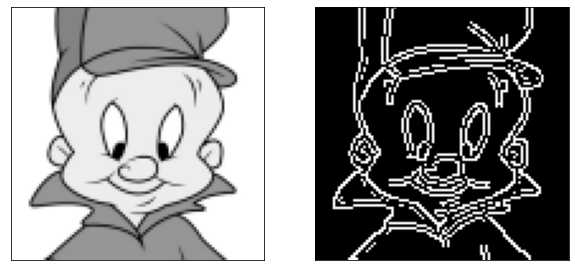

In [0]:
img = cv2.imread('/content/PRI/image.PNG', 0)
edges = cv2.Canny(img, 100, 255)
indices = np.where(edges != [0])
coordinates = zip(indices[0], indices[1])
indices=np.asarray(indices).T
indices=np.flip(indices)
indices[:,1]=abs(indices[:,1]-np.amax(indices))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

**Punto Fijo**

el tiempo requerido fue:69.46774697303772sg


/content/PRI/main_functions.py:198: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


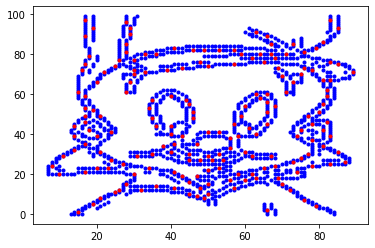

In [0]:
# ss= reducir el tamaño de muestras originales N veces 
# PC= criterio de paciencia
t = time.time()
p = PRI(n_groups=3, lambda_=15, sigma_initial=2, method='FP',
        reduction_ = False, max_iter=600,PC=400,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**SGD por mini lotes**

el tiempo requerido fue:1.475994348526001sg


/content/PRI/main_functions.py:479: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


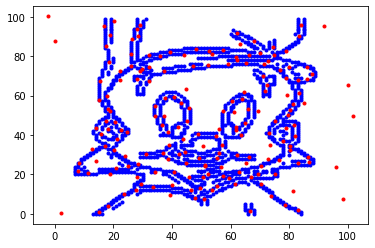

In [0]:

# PC= criterio de paciencia
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=40, method='SGD',
                 reduction_ = False,PC=500,lr=1.1,decay=0.00001,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**Adam**

/content/PRI/main_functions.py:479: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:1.4350457191467285sg


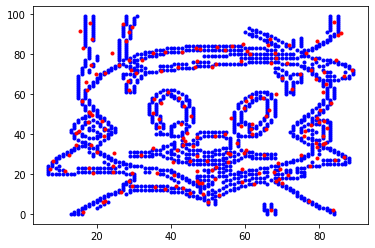

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=40, method='SGD', optimization='Adam',
                 reduction_ = False, PC=500,lr=0.2, decay=0.00001,ss=8)
p.fit(indices)

print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')


**NAdam**

el tiempo requerido fue:1.4678702354431152sg


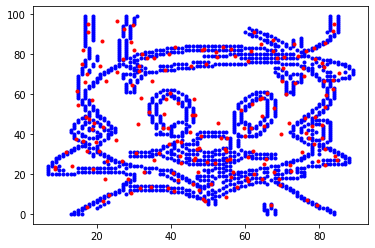

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=50, method='SGD', optimization='Nadam',
                 reduction_ = False, PC=500,lr=0.1, decay=0.00001,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**Guardar resultados**

In [0]:

import shutil
from joblib import dump, load
from datetime import date, datetime
save={'i':indices}
dump(save,'/content/PRI/DB2.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'indices'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')